<a href="https://colab.research.google.com/github/adwarnulkar/finance_modeling/blob/master/notebooks/goal_planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Planning

- Date : 01/27/2020

In [ ]:
home_cost = 1000000 # Cost of home
dp_perc = 20 # Down Payment percentage

In [ ]:
import pandas as pd
import numpy as np

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
D = dp_perc * home_cost / 100
print(f"Down Payment of home is ${D}")

Down Payment of home is $200000.0


## Variables at play
- s : investment per month (12*s becomes investment per annum)
- n : Number of years you want to wait to buy a house
- r : ROI per annum that you are expecting

## Sweeping over s
- For every possible s , find the years that it will take
- Repeat the above analysis for different r to model ROI noise

In [ ]:
def get_investment(D,N,r):
    return D / (12*sum([(1 + r/100)**i for i in np.arange(0,N+1)]))

def get_downpayment(s,N,r):
    return 12*s*sum([(1 + r/100)**i for i in np.arange(0,N+1)])

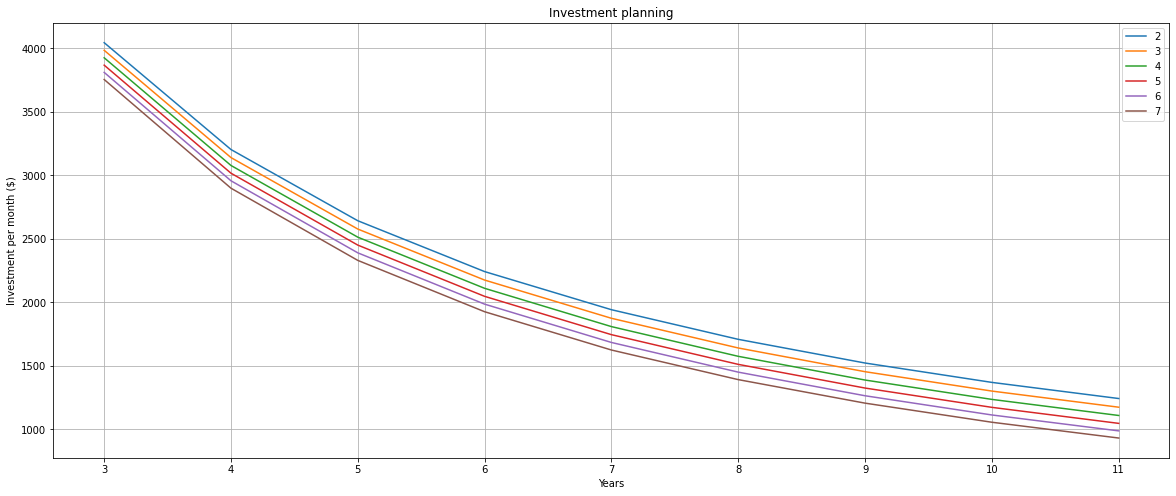

In [ ]:
plt.figure(figsize=[20,8])
for r in np.arange(2,8,1):
    n_list = np.arange(3,12)
    s_list = [get_investment(D,n,r) for n in n_list]
    plt.plot(n_list,s_list,label=r)

plt.title('Investment planning')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Investment per month ($)')
plt.grid()

In [ ]:
D = 200000
get_investment(D,N=6,r=6)

1985.5836343168478

In [ ]:
s = 300
get_downpayment(s,N=6,r=6)

30217.815539481606

## Performance of SP 500
- https://www.macrotrends.net/2526/sp-500-historical-annual-returns

## Yearly spending model

In [ ]:
def get_investment(target,rate):
    return round((1/12)*target/(1+rate/100))

def get_rate(target,investment):
    return (target/(investment*12) - 1)*100

In [ ]:
target = 3000
rate = 5
get_investment(target,rate)

238

In [ ]:
target = 3000
investment = 238
get_rate(target,investment)

5.042016806722693

# Model : Vacation Planning

In [ ]:
I = 300
r = 1.5
T = 1
N = 12*T

In [ ]:
def get_returns(I,r,N):
    '''Get Retuns (montly based model)'''
    return sum([I*((1+r/100)**(N-i+1)) for i in np.arange(1,N+1)])

In [ ]:
R = get_returns(I,r,N)
G = R - I*N
print(f"Returns {R:.1f}")
print(f"Gains {G:.1f}")
print(f"Post Tax returns {R-0.25*G:.1f}")

Returns 3971.0
Gains 371.0
Post Tax returns 3878.3


In [ ]:
N = np.arange(1,12*T)
returns_list = [get_returns(I,r,n) for n in N]

In [ ]:
p = figure(title="Vacation Planning",plot_width=800,plot_height=600)
p.line(N/12,returns_list,color='red',legend='Modeled growth curve')
p.scatter(N/12,returns_list,color='blue',size=6.0)
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Assert value of the growth ($)"
show(p)

# Model : Home planning

In [ ]:
I = 1800
r = 1.8
T = 6
N = 12*T

In [ ]:
R = get_returns(I,r,N)
G = R - I*N
print(f"Returns {R:.1f}")
print(f"Gains {G:.1f}")
print(f"Post Tax returns {R-0.25*G:.1f}")

Returns 265979.7
Gains 136379.7
Post Tax returns 231884.8


In [ ]:
N = np.arange(1,12*T)
returns_list = [get_returns(I,r,n) for n in N]

In [ ]:
p = figure(title="Home Planning",plot_width=900,plot_height=600)
p.line(N/12,returns_list,color='red',legend='Modeled growth curve')
p.scatter(N/12,returns_list,color='blue',size=6.0)
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Assert value of the growth ($)"
show(p)

# Model : Home Planning

In [ ]:
def get_investment(R,r,N):
    """
    R = Returns after growth
    r = Rate of interest per month
    N = Number of months
    """
    return R / sum([((1+r/100)**(N-i)) for i in np.arange(0,N)])

In [ ]:
goal_dict = {}

In [ ]:
R = 250000
r = 2
T = 6
N = 12*T

In [ ]:
I = get_investment(R,r,N)
goal_dict['home'] = I
I

1550.6938011994614

In [ ]:
R = get_returns(I,r,N)
G = R - I*N
print(f"Returns ${R:.1f}")
print(f"Gains ${G:.1f}")
print(f"Post Tax returns ${R-0.25*G:.1f}")

N = np.arange(1,12*T)
returns_list = [get_returns(I,r,n) for n in N]

p = figure(title="Home Planning",plot_width=900,plot_height=500)
p.line(N/12,returns_list,color='red',legend='Modeled growth curve')
p.scatter(N/12,returns_list,color='blue',size=6.0)
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Assert value of the growth ($)"
show(p)

Returns $250000.0
Gains $138350.0
Post Tax returns $215412.5


In [ ]:
R = 3000
r = 1
T = 1
N = 12*T

In [ ]:
I = get_investment(R,r,N)
goal_dict['vacation'] = I
I

234.20432280695562

In [ ]:
R = get_returns(I,r,N)
G = R - I*N
print(f"Returns ${R:.1f}")
print(f"Gains ${G:.1f}")
print(f"Post Tax returns ${R-0.25*G:.1f}")

N = np.arange(1,12*T)
returns_list = [get_returns(I,r,n) for n in N]

p = figure(title="Vacation Planning",plot_width=900,plot_height=500)
p.line(N/12,returns_list,color='red',legend='Modeled growth curve')
p.scatter(N/12,returns_list,color='blue',size=6.0)
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Assert value of the growth ($)"
show(p)

Returns $3000.0
Gains $189.5
Post Tax returns $2952.6


# Model : Wedding

In [ ]:
R = 5000
r = 1.5
T = 1
N = 12*T

In [ ]:
I = get_investment(R,r,N)
goal_dict['wedding'] = I
I

377.73395520309845

In [ ]:
R = get_returns(I,r,N)
G = R - I*N
print(f"Returns ${R:.1f}")
print(f"Gains ${G:.1f}")
print(f"Post Tax returns ${R-0.25*G:.1f}")

N = np.arange(1,12*T)
returns_list = [get_returns(I,r,n) for n in N]

p = figure(title="Wedding Planning",plot_width=900,plot_height=500)
p.line(N/12,returns_list,color='red',legend='Modeled growth curve')
p.scatter(N/12,returns_list,color='blue',size=6.0)
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Assert value of the growth ($)"
show(p)

Returns $5000.0
Gains $467.2
Post Tax returns $4883.2


# Model : Retirement

In [ ]:
goal_dict['retirement'] = 891.1

In [ ]:
goal_dict

{'home': 1550.6938011994614,
 'retirement': 891.1,
 'vacation': 234.20432280695562,
 'wedding': 377.73395520309845}

In [ ]:
df_goal = pd.DataFrame({'goal':[k for k,v in goal_dict.items()],'model_investment':[v for k,v in goal_dict.items()]})
df_goal

,goal,model_investment
0,home,1550.693801
1,vacation,234.204323
2,wedding,377.733955
3,retirement,891.100000


In [ ]:
#df_goal.to_csv("model_goal_allocation.csv")

# Bucketizing monthly savings

In [ ]:
def get_investment(R,r,N):
    """
    R = Returns after growth
    r = Rate of interest per month
    N = Number of months
    """
    return R / sum([((1+r/100)**(N-i)) for i in np.arange(0,N)]

In [5]:
import gspread
import pandas as pd
from google.colab import auth
auth.authenticate_user()
from google.auth import default

creds, _ = default()


In [2]:
gc = gspread.authorize(creds)
worksheet = gc.open('goal_summary').sheet1

In [11]:
rows = worksheet.get_all_values()
df_goal = pd.DataFrame.from_records(rows)
df_goal.columns = df_goal.iloc[0]
df_goal = df_goal.iloc[1:]

In [12]:
df_goal

,goal_name,goal_time,goal_amount
1,vacation,1,14000
2,electronics,1,2000
3,house upgrade,1,2000
4,kids bringup,3,15000
5,kids education,16,60000
